In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('zomato.csv', encoding='unicode_escape')

#  EDA
1.Missing Values
2.explore about the numerical Variables
3.explore about categorical variable
4. finding duplicates

In [12]:
df.isnull().sum()   

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [13]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<Axes: >

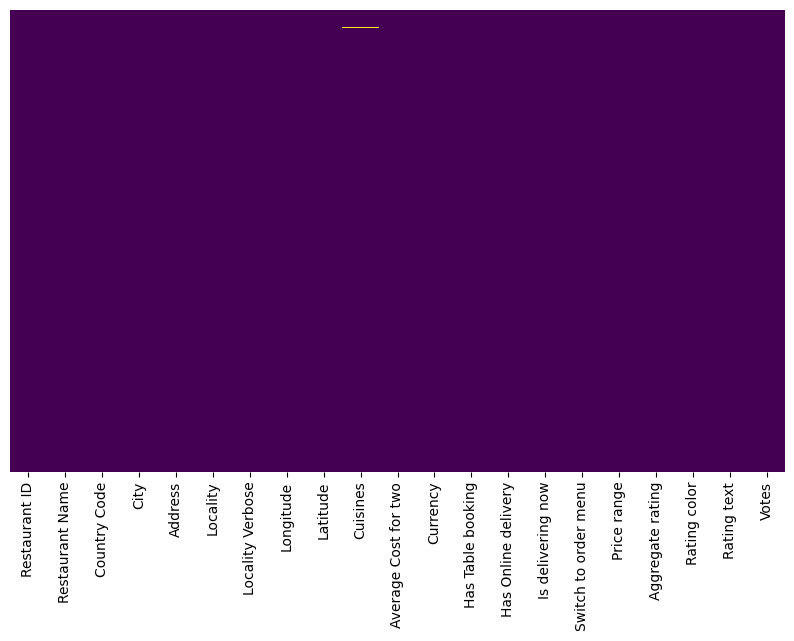

In [59]:
matplotlib.rcParams['figure.figsize']=(10,6)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
df_country=pd.read_excel('Country-code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [21]:
final_df=pd.merge(df,df_country,on='Country Code', how='left')
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [24]:
country_names=final_df.Country.value_counts().index

In [28]:
country_val=final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x291d6f12a00>,
 [Text(-1.082974277862112, 0.1927867046480056, 'India'),
  Text(1.0772816964394372, -0.22240536530526556, 'United States'),
  Text(1.0995865232164619, -0.030157552300104404, 'United Kingdom')],
 [Text(-0.5907132424702428, 0.10515638435345759, '94.39%'),
  Text(0.5876081980578747, -0.12131201743923574, '4.73%'),
  Text(0.5997744672089791, -0.01644957398187513, '0.87%')])

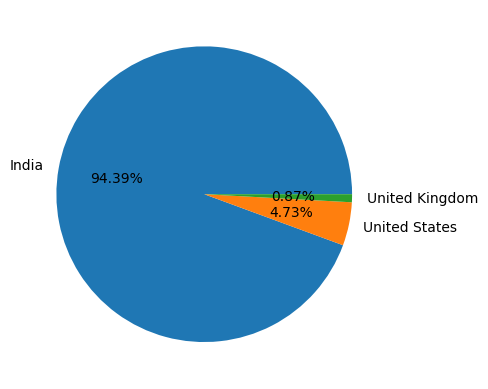

In [34]:
## top 3 countries that uses zomato
plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%') 

## Observations: 
# zomato maximus records are from india followed by USA and UK

In [35]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [47]:
ratings=final_df.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## Observation 
1. When rating is between 4.5 to 4.9 --> excellent
2. when ratings are between 4.0 to 4.4 -> very good
3. when ratings are between 3.5 to 3.9 -> good
4. when ratings are between 3.0 to 3.4 -> average

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

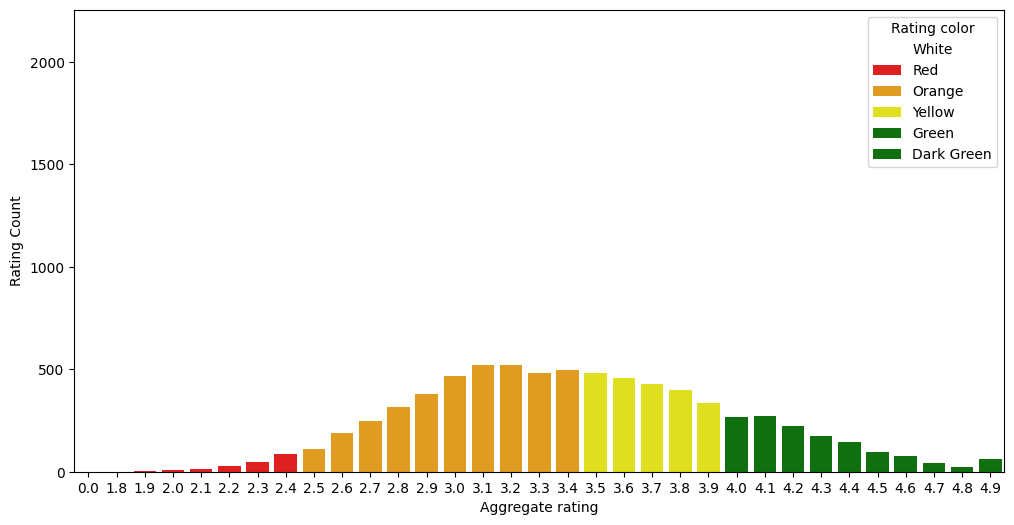

In [63]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x='Aggregate rating', y='Rating Count', data=ratings, hue='Rating color',palette=['white','red','orange','yellow','green','green'])

## observations:
1.not rated count is very high
2.maximum rating between 3 to 4


C:\Users\ameyc\AppData\Local\Temp\ipykernel_10464\4086959136.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating color', data=ratings, palette=['white','red','orange','yellow','green','green'])


<Axes: xlabel='Rating color', ylabel='count'>

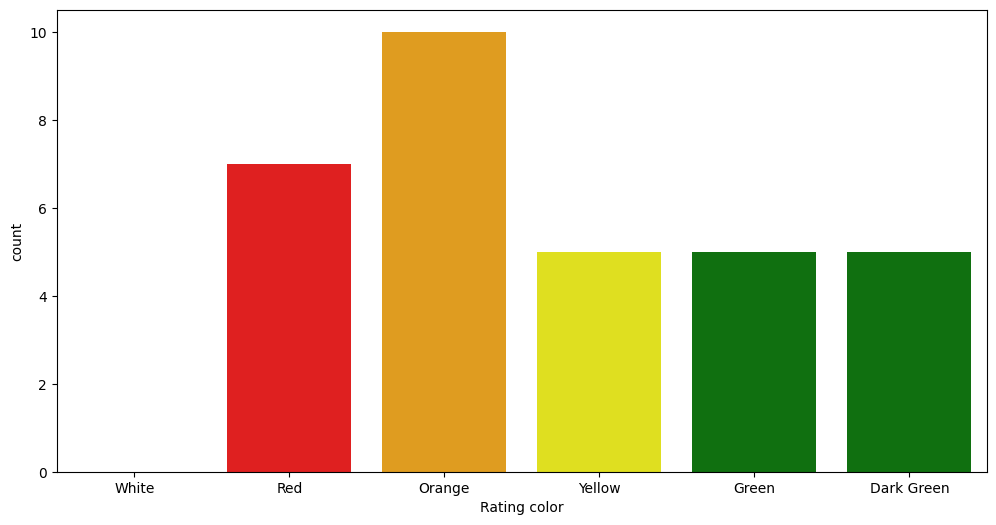

In [64]:
sns.countplot(x='Rating color', data=ratings, palette=['white','red','orange','yellow','green','green'])

### fIND THE COUNTRY NAME THAT HAS GIVEN 0 RATING


In [68]:
final_df.head()[['Aggregate rating','Country','Rating text']]

,Aggregate rating,Country,Rating text
0,4.8,Phillipines,Excellent
1,4.5,Phillipines,Excellent
2,4.4,Phillipines,Very Good
3,4.9,Phillipines,Excellent
4,4.8,Phillipines,Excellent


In [76]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


### Observations
maximum no's of zero rating are from indidan customers

### find out which currency is used by which country

In [77]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [82]:
final_df.groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


### Which countries do have online deliveries option

In [87]:
final_df[final_df['Has Online delivery']=='Yes'].Country.value_counts().reset_index()

,Country,count
0,India,2423
1,UAE,28


In [88]:
final_df.groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


In [89]:
Observations:
1. online deliveries are availble in India and UAE


SyntaxError: invalid syntax (2516777900.py, line 1)

In [95]:
city_values=final_df.City.value_counts().values
city_labels=final_df.City.value_counts().index

([<matplotlib.patches.Wedge at 0x291ddcb1d00>,
 [Text(-0.6145353730323401, 0.9123301350344637, 'New Delhi'),
  Text(0.06236774886414425, -1.0982305149200777, 'Gurgaon'),
  Text(0.878904221413572, -0.6614585169014024, 'Noida'),
  Text(1.0922218482114119, -0.1305811406354216, 'Faridabad'),
  Text(1.099946277419523, -0.010871374841004297, 'Ghaziabad')],
 [Text(-0.33520111256309454, 0.4976346191097074, '68.87%'),
  Text(0.03401877210771504, -0.5990348263200423, '14.07%'),
  Text(0.479402302589221, -0.36079555467349217, '13.59%'),
  Text(0.5957573717516791, -0.07122607671022996, '3.16%'),
  Text(0.5999706967742853, -0.00592984082236598, '0.31%')])

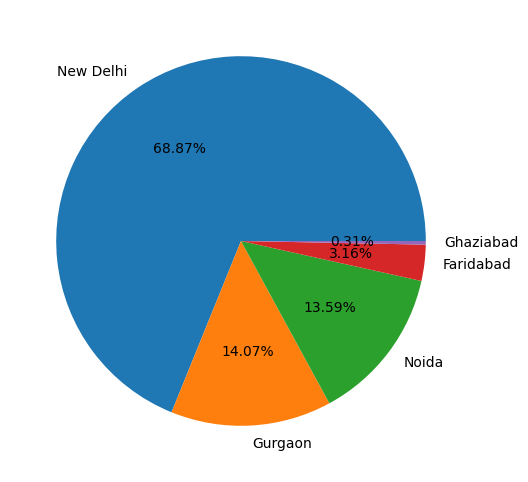

In [97]:
plt.pie(city_values[:5],labels=city_labels[:5], autopct='%1.2f%%')

In [ ]:
## Assignment
find top 10 cousins

In [98]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [109]:
top_cuisines_votes = final_df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)
print(top_cuisines_votes)

Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


### Observations
North Indian mughlai is the most voted cuisines

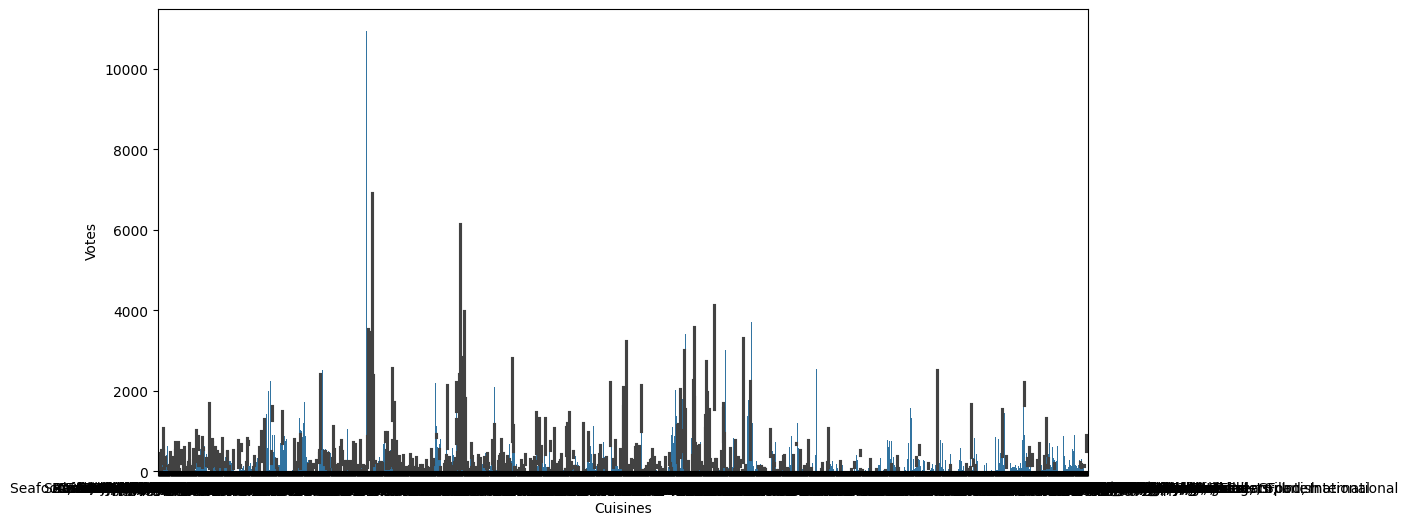

In [114]:
ax = sns.barplot(x = 'Cuisines',y='Votes',data = final_df)
